<a href="https://colab.research.google.com/github/surodoot/Python/blob/main/Machine_Learning/Detection_COVID_19_in_Chest_X_ray_using_CNN_and_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np  
import os
from glob import glob
from matplotlib import pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

height = 100
width = 100

def imread_gray(file):
    return cv2.imread(file, cv2.IMREAD_GRAYSCALE)

def resize(img):
    return cv2.resize(img, (height, width))

os.chdir("/content/drive/MyDrive/dataset/COVID-19 Chest X-ray/COVID") #dataset source : https://www.kaggle.com/ahmadalmahsiri/covid19-chest-xray
covid_data = glob("*")
covid_data = list(map(imread_gray, covid_data))
covid_data = list(map(resize, covid_data))

os.chdir("/content/drive/MyDrive/dataset/COVID-19 Chest X-ray/Normal")  #dataset source : https://www.kaggle.com/ahmadalmahsiri/covid19-chest-xray
normal_data = glob("*")
normal_data = list(map(imread_gray, normal_data))
normal_data = list(map(resize, normal_data))

covid_len = len(covid_data)
normal_len = len(normal_data)

covid_data = np.array(covid_data)
normal_data = np.array(normal_data)

x = np.concatenate((covid_data, normal_data), axis = 0)
y = np.concatenate((np.ones(covid_len), np.zeros(normal_len)), axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True)

model = tf.keras.Sequential()

model.add(Conv2D(input_shape = (height, width, 1), kernel_size = (5, 5),
                filters = 32, activation='relu'))
model.add(Conv2D(kernel_size = (5, 5), filters = 64, 
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 10, epochs = 10, 
        validation_data = (x_test, y_test))


Epoch 1/10
178/178 [==============================] - 160s 898ms/step - loss: 4.9564 - accuracy: 0.8712 - val_loss: 0.2473 - val_accuracy: 0.9187
Epoch 2/10
178/178 [==============================] - 158s 890ms/step - loss: 0.3544 - accuracy: 0.8982 - val_loss: 0.2551 - val_accuracy: 0.9201
Epoch 3/10
178/178 [==============================] - 159s 893ms/step - loss: 0.1957 - accuracy: 0.9370 - val_loss: 0.2099 - val_accuracy: 0.9135
Epoch 4/10
178/178 [==============================] - 158s 888ms/step - loss: 0.1675 - accuracy: 0.9404 - val_loss: 0.4020 - val_accuracy: 0.9318
Epoch 5/10
178/178 [==============================] - 159s 891ms/step - loss: 0.1481 - accuracy: 0.9595 - val_loss: 0.2231 - val_accuracy: 0.9371
Epoch 6/10
178/178 [==============================] - 158s 890ms/step - loss: 0.1867 - accuracy: 0.9618 - val_loss: 0.4921 - val_accuracy: 0.8519
Epoch 7/10
178/178 [==============================] - 158s 887ms/step - loss: 0.2362 - accuracy: 0.9139 - val_loss: 0.4064 -

In [3]:
model.predict(x)

array([[1.6228437e-02, 9.8377150e-01],
       [2.9939724e-02, 9.7006029e-01],
       [9.9185014e-01, 8.1499098e-03],
       ...,
       [1.0000000e+00, 1.1649470e-15],
       [9.9999952e-01, 4.9616045e-07],
       [1.0000000e+00, 3.1710246e-11]], dtype=float32)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 conv2d_3 (Conv2D)           (None, 92, 92, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 46, 46, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 135424)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               17334400  
                                                      

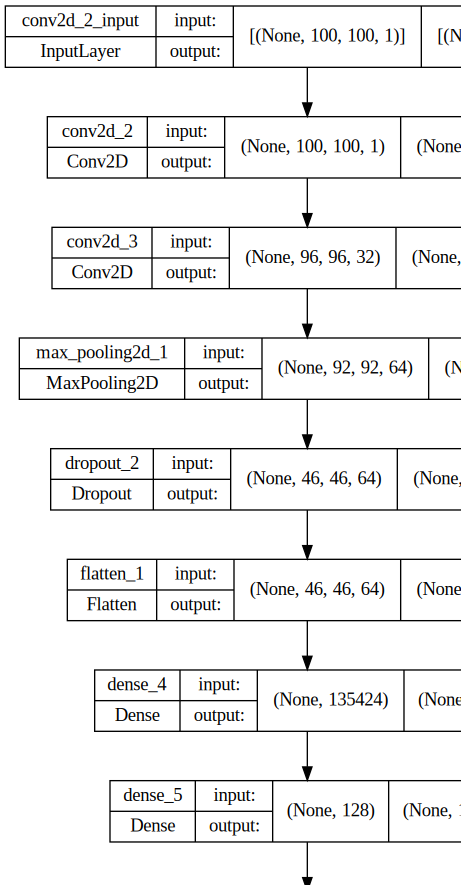

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))